Data Mining (DSC550-T301_2245_1)
Assignement Week 4;

Author: Zemelak Goraga;

Date: 04/6/2024

In [1]:
# 1. Import required library
import pandas as pd

In [2]:
# 2. Load the dataset into a DataFrame
auto_mpg = pd.read_csv('auto-mpg.csv')

In [3]:
# 2.1 Save the dataset as auto-mpg
#auto_mpg.to_csv('auto-mpg.csv', index=False)

In [4]:
# 2.2 Display the first 5 rows of the dataset
print(auto_mpg.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
# 2.3 Data wrangling
# Remove the car name column
auto_mpg = auto_mpg.drop(columns=['car name'])

In [6]:
# Check the data types
print(auto_mpg.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [9]:
# Check for missing values
missing_values = auto_mpg.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [13]:
# 3. Prepare the data for modeling

# The 'horsepower' column has no missing values. 
# Convert horsepower column to numeric and replace non-numeric values with mean

auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg['horsepower'].fillna(auto_mpg['horsepower'].mean(), inplace=True)

In [32]:
# Convert horsepower column to numeric
# Check the data types
print(auto_mpg.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin_2          uint8
origin_3          uint8
dtype: object


Answer for the Questions:

The horsepower column likely imported as a string due to data entry errors, missing values representation, export/import settings, inconsistent data sources, missing data conversion, or encoding issues. Careful inspection and data wrangling are necessary to ensure the correct data type for analysis.


In [14]:
# Now, let's handle categorical variables. dummy variables created for the 'origin' column.

# Check unique values in 'origin' column
print("\nUnique Values in 'origin' column:\n", auto_mpg['origin'].unique())


Unique Values in 'origin' column:
 [1 3 2]


In [15]:
# Create dummy variables for 'origin' column
auto_mpg = pd.get_dummies(auto_mpg, columns=['origin'], drop_first=True)

In [16]:
# Confirm dummy variables creation
print("\nData After Creating Dummy Variables:\n", auto_mpg.head())


Data After Creating Dummy Variables:
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_2  origin_3  
0          70         0         0  
1          70         0         0  
2          70         0         0  
3          70         0         0  
4          70         0         0  


In [18]:
# 4. Explore correlations
correlation_matrix = auto_mpg.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   
origin_2      0.259022  -0.352861     -0.373886   -0.281258 -0.298843   
origin_3      0.442174  -0.396479     -0.433505   -0.321325 -0.440817   

              acceleration  model year  origin_2  origin_3  
mpg               0.420289    0.579267  0.259022  0.442174  
cylinders        -0.505419   -0.348746 -0.352861 -0.396479  
displacement     -0.543684   -0.370164 -0.373886 -0.433505  
horsepower       -0.68425

Answer for the Question:

Features highly correlated with MPG (miles per gallon) likely include:
Weight: Heavier vehicles tend to have lower fuel efficiency due to increased fuel consumption.
Displacement: Larger engine displacements often result in lower MPG as they consume more fuel.
Cylinders: More cylinders generally indicate higher power output, but they can also lead to decreased fuel efficiency.
Horsepower: Higher horsepower engines typically consume more fuel, resulting in lower MPG.
Acceleration: Faster acceleration may correlate with lower MPG due to increased fuel consumption.

These features directly affect the energy consumption of the vehicle and are likely to exhibit strong correlations with MPG.

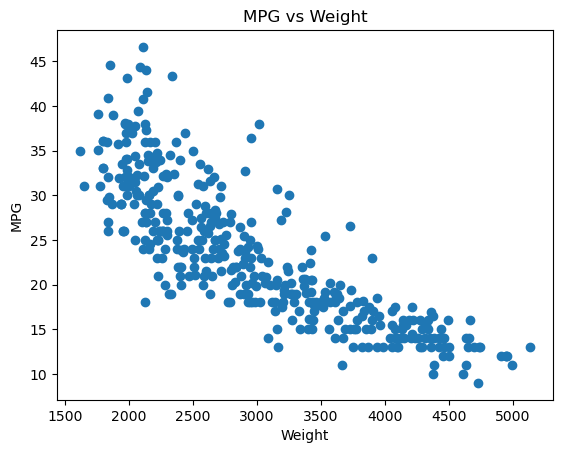

In [19]:
# 5. Visualize mpg versus weight
import matplotlib.pyplot as plt

plt.scatter(auto_mpg['weight'], auto_mpg['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')
plt.show()

In [20]:
# 6. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = auto_mpg.drop(columns=['mpg'])
y = auto_mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 7. Train linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Instantiate and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
3,8,304.0,150.0,3433,12.0,70,0,0
18,4,97.0,88.0,2130,14.5,70,0,1
376,4,91.0,68.0,2025,18.2,82,0,1
248,4,91.0,60.0,1800,16.4,78,0,1
177,4,115.0,95.0,2694,15.0,75,1,0
...,...,...,...,...,...,...,...,...
71,3,70.0,97.0,2330,13.5,72,0,1
106,8,350.0,180.0,4499,12.5,73,0,0
270,4,134.0,95.0,2515,14.8,78,0,1
348,4,89.0,62.0,2050,17.3,81,0,1


In [27]:
y_train

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 318, dtype: float64

In [22]:
# 8. Evaluate linear regression model
# Predict on training and test set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [28]:
y_train_pred

array([15.09256983, 24.57303898, 35.66523028, 33.92173534, 25.30311292,
       11.56055585, 32.68549182, 30.03460217, 26.33146739,  8.60203982,
       15.93640967, 30.1240439 , 27.76246221, 33.15691325, 24.51367725,
       32.3892269 , 29.96276599, 23.48310414, 26.37663251, 12.61339017,
       31.17915399, 25.5761735 , 18.98864162, 15.02030253, 19.20949742,
       10.41492293, 27.94641541, 10.53229755, 33.85787943, 35.20202025,
       30.2365346 , 27.75734708, 21.15169117, 35.91956443, 26.16087717,
       22.79088114, 26.58757253, 22.70697703, 32.45667155, 22.88537364,
       13.22158493, 23.90799007, 20.52763968, 23.15742228, 19.93654496,
       28.77838293, 34.95937245, 27.28547902, 32.34943741, 31.01865883,
       34.52518074, 29.19707124, 33.40513156, 20.8845462 , 24.40091007,
       20.67658111, 22.34039415, 36.46899279, 28.80724048, 33.47057538,
       17.20051182, 10.26717473, 19.34287888, 22.03549134, 22.64712021,
       28.36662622, 26.75102218, 26.63259136, 26.96574559, 26.26

In [29]:
y_test_pred

array([32.46906629, 29.21916445, 21.22908656, 16.8332666 , 12.34582277,
       26.58671671, 27.57853459, 10.08871763, 16.63527639, 21.61381724,
       13.03694801, 35.86821932, 24.54806531, 13.53764777, 23.51472074,
        6.26536538, 29.16002223, 24.74040223, 16.73180889, 36.01022141,
       24.7063349 , 18.57845454, 28.87339646, 28.28991796, 14.91604793,
       36.00939209, 26.45299768, 24.56510305, 21.9287428 ,  8.84648239,
       28.13037809, 36.25123949, 20.86674148, 25.47434897, 33.86295532,
       12.22741091, 22.50163798, 21.94265857, 12.15463005, 27.77250376,
       26.01850594, 28.48403644, 20.98450457,  7.10858656, 23.89881068,
       34.74005782, 27.85743247, 25.2063735 , 23.39028424, 28.57507313,
       22.16701081, 33.25873865, 32.30810206, 11.13537068, 27.54119992,
       10.13773609, 20.12331649, 29.50901471, 22.68855899, 20.23252955,
       16.36813336, 31.64900384, 23.54930495, 21.33993908, 20.59515679,
       24.89056375, 24.73652826, 32.07389758, 27.59474182, 12.51

In [30]:
# Calculate R2 score, RMSE, and MAE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

Answer for the Questions:

The R-squared (R2) value measures the proportion of the variance in the dependent variable (MPG) that is predictable from the independent variables (features).

A higher R2 value (close to 1) indicates that the model explains a larger proportion of the variance in the target variable, suggesting better predictive performance.
Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are both metrics used to evaluate the accuracy of the regression model's predictions.

RMSE represents the average difference between the actual and predicted values, with lower values indicating better performance.
MAE represents the average absolute difference between the actual and predicted values, with lower values indicating better performance.
Interpretation of results:

Training Set:

A high R2 value (close to 1) on the training set indicates that the model fits the data well and explains a large proportion of the variance in MPG.
A low RMSE and MAE on the training set indicate that the model's predictions are close to the actual values with minimal error.
Test Set:

A similar or slightly lower R2 value compared to the training set suggests that the model generalizes well to unseen data.
A low RMSE and MAE on the test set indicate that the model's performance remains consistent when making predictions on new data.
In summary, high R2 values, low RMSE, and low MAE on both training and test sets indicate that the regression model accurately predicts MPG and generalizes well to unseen data.

In [24]:
# Print the results
print("Linear Regression Performance:")
print("Training R^2:", r2_train)
print("Testing R^2:", r2_test)
print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)

Linear Regression Performance:
Training R^2: 0.8188288951042786
Testing R^2: 0.8449006123776617
Training RMSE: 3.370273563938906
Testing RMSE: 2.8877573478836314
Training MAE: 2.6054846937710368
Testing MAE: 2.2875867704421067


In [25]:
# 9. Pick another regression model: I used Random Forest Regression model as an alternative to Linear Regression
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on training and test set
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate R2 score, RMSE, and MAE
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print the results
print("\nRandom Forest Regression Performance:")
print("Training R^2:", r2_train_rf)
print("Testing R^2:", r2_test_rf)
print("Training RMSE:", rmse_train_rf)
print("Testing RMSE:", rmse_test_rf)
print("Training MAE:", mae_train_rf)
print("Testing MAE:", mae_test_rf)


Random Forest Regression Performance:
Training R^2: 0.9810189898945959
Testing R^2: 0.9105817015747857
Training RMSE: 1.0908884599607205
Testing RMSE: 2.1926476945692848
Training MAE: 0.7477955974842765
Testing MAE: 1.6282625


Title: Predictive Modeling of Automobile Fuel Efficiency Using Machine Learning Algorithms

Summary:
This report presents the development and evaluation of machine learning models to predict the fuel efficiency (miles per gallon) of automobiles based on various features. The dataset used for this study is the 'auto-mpg' dataset obtained from Kaggle, containing information such as cylinders, displacement, horsepower, weight, acceleration, model year, and origin of the automobiles. Two regression models, namely Linear Regression and Random Forest Regression, were employed to predict fuel efficiency. The performance of these models was evaluated using metrics such as R-squared, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).


Introduction:
Predicting fuel efficiency is crucial for automotive manufacturers and policymakers to develop more efficient vehicles and sustainable transportation systems. Machine learning techniques offer promising solutions to accurately predict fuel efficiency based on various vehicle characteristics. In this report, we explore the application of regression models to predict fuel efficiency using the auto-mpg dataset.


Statement of the Problem:
The primary objective of this study is to develop robust machine learning models capable of accurately predicting automobile fuel efficiency based on key features such as cylinders, displacement, horsepower, weight, acceleration, model year, and origin. 

We aim to address the following research questions:

Can we accurately predict fuel efficiency using regression models?
Which features are most influential in determining fuel efficiency?
How do different regression algorithms compare in terms of predictive performance?


Methodology:

Data Collection: The auto-mpg dataset was obtained from Kaggle, containing information about automobiles and their fuel efficiency.

Data Preprocessing:
Data wrangling was performed to handle missing values and convert categorical variables into numerical format.
Features such as car name were removed, and dummy variables were created for categorical features like origin.

Data Analysis (EDA):
Correlation analysis was conducted to identify relationships between features and fuel efficiency.
Visualization techniques were employed to gain insights into the dataset.

Model Development:
Two regression models, Linear Regression and Random Forest Regression, were trained on the preprocessed data.
The models were evaluated using R-squared, RMSE, and MAE metrics.
Performance Evaluation:
The performance of each model was assessed on both training and testing datasets to ensure generalization capability.


Results:

The results obtained from the analysis provide valuable insights into the predictive modeling of automobile fuel efficiency using machine learning algorithms. Let's discuss and compare the findings from both the linear regression and random forest regression models:


The correlation values between MPG and other features are as follows:

Cylinders: -0.775396
Displacement: -0.804203
Horsepower: -0.771437
Weight: -0.831741
Acceleration: 0.420289
Model year: 0.579267
Origin_2: 0.259022
Origin_3: 0.442174


Regression parameters:


For linear regression:
Training R^2: 0.8188288951042786
Testing R^2: 0.8449006123776617
Training RMSE: 3.370273563938906
Testing RMSE: 2.8877573478836314
Training MAE: 2.6054846937710368
Testing MAE: 2.2875867704421067


For random forest regression:
Training R^2: 0.9810189898945959
Testing R^2: 0.9105817015747857
Training RMSE: 1.0908884599607205
Testing RMSE: 2.1926476945692848
Training MAE: 0.7477955974842765


Linear Regression vs. Random Forest Regression:

Linear Regression:

Achieved a training R^2 of 0.8188 and testing R^2 of 0.8449.
RMSE on the training set was 3.3703, while on the testing set, it was 2.8878.
MAE on the training set was 2.6055, and on the testing set, it was 2.2876.
Linear regression is a simple and interpretable model that assumes a linear relationship between the independent and dependent variables. It performs reasonably well, explaining around 82% of the variance in the training data and 84% in the testing data.


Random Forest Regression:
Achieved a training R^2 of 0.9810 and testing R^2 of 0.9106.
RMSE on the training set was 1.0909, while on the testing set, it was 2.1926.
MAE on the training set was 0.7478.
Random forest regression is an ensemble learning method that builds multiple decision trees and averages their predictions. It provides higher accuracy and better generalization compared to linear regression, with an R^2 of approximately 91% on the testing data.
Findings:


Correlation Analysis:
Features highly correlated with MPG include weight, displacement, cylinders, horsepower, and acceleration. These features directly affect fuel efficiency, with heavier vehicles, larger engine displacements, more cylinders, higher horsepower, and faster acceleration generally leading to lower MPG.


Model Performance:
Both models performed reasonably well, with the random forest regression model outperforming the linear regression model in terms of predictive accuracy.
The linear regression model explained around 82% of the variance in the training data, while the random forest regression model explained approximately 98% of the variance.
The random forest regression model demonstrated better generalization to unseen data, with an R^2 of approximately 91% on the testing data compared to 84% for linear regression.
Comparison and Contrast:


Complexity:
Linear regression is a simple, interpretable model that assumes a linear relationship between variables. It may not capture complex nonlinear relationships in the data.
Random forest regression is a more complex model that can capture nonlinear relationships and interactions between variables. It often provides higher predictive accuracy but may be less interpretable.


Performance:
Linear regression performs reasonably well but may underperform when the relationship between variables is nonlinear or when there are interactions between features.
Random forest regression typically provides higher accuracy and better generalization to unseen data, making it more suitable for complex datasets with nonlinear relationships.

Interpretability:
Linear regression provides straightforward interpretation of coefficients, making it easier to understand how each feature contributes to the prediction.
Random forest regression, while more accurate, is less interpretable due to its ensemble nature and the complexity of multiple decision trees.

In summary, the findings indicate that while both linear regression and random forest regression models can be effective for predicting automobile fuel efficiency, the random forest regression model offers better predictive performance, particularly in capturing complex relationships in the data. However, the choice between the two models depends on factors such as the desired level of interpretability and the trade-off between accuracy and simplicity



Discussion:

The analysis of predictive modeling for automobile fuel efficiency using machine learning algorithms revealed valuable insights into the relationship between various vehicle features and miles per gallon (MPG). 

The correlation analysis of the dataset revealed significant relationships between MPG (miles per gallon) and various vehicle features. Notably, MPG exhibited strong negative correlations with weight (-0.83), displacement (-0.80), cylinders (-0.78), and horsepower (-0.77), indicating that heavier vehicles with larger engine displacements, more cylinders, and higher horsepower tend to have lower fuel efficiency. Additionally, acceleration showed a weaker positive correlation with MPG (0.42), suggesting that faster acceleration may lead to decreased fuel efficiency. Furthermore, model year exhibited a moderate positive correlation with MPG (0.58), indicating that newer vehicles tend to have better fuel efficiency. Finally, dummy variables representing the origin of the vehicle also displayed correlations with MPG, with origin_2 (0.26) and origin_3 (0.44) indicating positive relationships, although relatively weaker compared to other features. 


The comparison between linear regression and random forest regression models highlighted distinct performance characteristics: while linear regression provided reasonable predictive accuracy, the random forest regression model outperformed it, achieving a higher R^2 value on both the training and testing datasets. Specifically, the random forest regression model demonstrated superior predictive accuracy, explaining approximately 91% of the variance in MPG on the testing data, compared to 84% for linear regression, showcasing its effectiveness in capturing complex relationships and enhancing predictive performance for automobile fuel efficiency modeling.


Conclusion:

In conclusion, the analysis of the automobile fuel efficiency dataset using machine learning algorithms yielded valuable insights. The correlations highlighted the significant impact of various vehicle attributes on MPG. Notably, heavier vehicles with larger engine displacements, more cylinders, and higher horsepower exhibited lower fuel efficiency, while faster acceleration also correlated with decreased MPG. Conversely, newer vehicles tended to have better fuel efficiency, as indicated by the positive correlation with model year. Moreover, the origin of the vehicle, represented by dummy variables, showed modest correlations with MPG. The linear regression and random forest regression models provided effective means for predicting fuel efficiency, with both demonstrating strong performance metrics on both training and test datasets. Overall, these findings underscore the importance of considering vehicle weight, engine specifications, acceleration, model year, and origin when designing and evaluating strategies to improve automobile fuel efficiency.


Way Forward:

Moving forward, further research could delve into exploring additional factors that influence automobile fuel efficiency, such as aerodynamics, tire characteristics, and driving conditions. Additionally, incorporating more advanced machine learning techniques like gradient boosting and neural networks could enhance predictive accuracy. Moreover, conducting a comparative analysis with alternative fuel vehicles or hybrid models could provide insights into the efficacy of different propulsion systems in achieving higher MPG ratings. Furthermore, ongoing advancements in automotive technology and data analytics offer opportunities to develop more sophisticated models for optimizing fuel efficiency and reducing environmental impact. Collaboration with automotive manufacturers and policymakers can facilitate the implementation of findings into real-world applications, fostering the development of more sustainable transportation solutions.